In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [21]:
data = pd.read_csv("./data.txt", sep='\s+')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_9903/3480194947.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("./data.txt", sep='\s+')


,date,hour,minute,second,price,size
0,20100104,9,30,0,57.65,3910
1,20100104,9,30,0,57.65,3910
2,20100104,9,30,0,57.70,400
3,20100104,9,30,0,57.68,100
4,20100104,9,30,0,57.69,300


In [22]:
data.dtypes

date        int64
hour        int64
minute      int64
second      int64
price     float64
size        int64
dtype: object

In [23]:
data["datetime"]= pd.to_datetime(data["date"].astype(str)+"-"+data["hour"].astype(str)+":"+data["minute"].astype(str)+":"+data["second"].astype(str), format="%Y%m%d-%H:%M:%S")
data = data.drop(["hour", "date", "minute", "second", "size"], axis=1)
data.head()


,price,datetime
0,57.65,2010-01-04 09:30:00
1,57.65,2010-01-04 09:30:00
2,57.70,2010-01-04 09:30:00
3,57.68,2010-01-04 09:30:00
4,57.69,2010-01-04 09:30:00


In [24]:
x = data["datetime"]
y = data["price"]

In [25]:
xNum   = (data["datetime"]- data["datetime"].min()).dt.total_seconds()
xNum

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
37711    23397.0
37712    23398.0
37713    23399.0
37714    23400.0
37715    23400.0
Name: datetime, Length: 37716, dtype: float64

In [36]:
#fit the curve
def gompCurve(t, a,b,c):
    return a*np.exp(-b*np.exp(-c*t))

length = len(x)
if length==0:
    middleIdx = length//2 -1
else:
    middleIdx = length//2
    
initialA = max(y)
initialC = 1/ pd.Timestamp(x[middleIdx]).year
initialB = 2.72

popt, pcov = curve_fit(gompCurve, xNum, y, p0=(initialA, initialB, initialC))

print("Optimized paramters are", popt)
a,b,c = popt

Optimized paramters are [5.87828484e+01 2.16285419e-02 5.41046960e-04]


In [37]:
ypred = gompCurve(xNum,a,b,c)

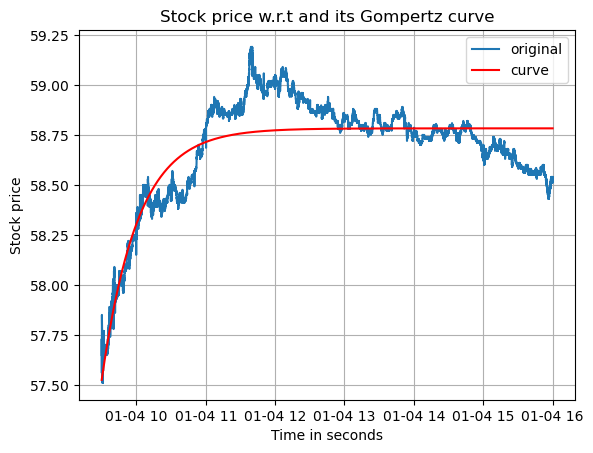

In [38]:
plt.plot(x, y, label="original")
plt.plot(x, ypred, label ="curve", color="red" )
plt.xlabel("Time in seconds")
plt.ylabel("Stock price")
plt.title("Stock price w.r.t and its Gompertz curve")
plt.legend()
plt.grid()

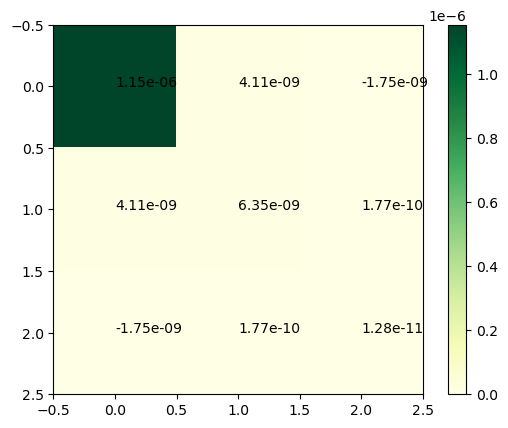

In [49]:
#cov matrix
covMat = plt.imshow(pcov, cmap="YlGn")
plt.colorbar(covMat)

for i in range(pcov.shape[0]):
    for j in range(pcov.shape[1]):
        plt.text(j,i, f"{pcov[i,j]:.2e}")


In [50]:
r2 = r2_score(y, ypred)
r2

0.7621206362769